In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.saving import save_model

In [126]:
train_df = pd.read_csv('NSE-TATAGLOBAL.csv')
train_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


### Step 1 :- Preparing training data

In [127]:
training_data = train_df.iloc[:, 1:2].values
training_data

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [128]:
train_df.shape

(2035, 8)

In [129]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = sc.fit_transform(training_data)

In [130]:
#Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_data)):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [131]:
X_train.shape

(1975, 60)

In [132]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1975, 60, 1)

### Step 2 :- Model Building 

In [133]:
# Building an RNN
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [134]:
input_shape = (X_train.shape[1], X_train.shape[2])

In [135]:
#Initializing RNN
def create_model_RNN(input_shape):
    regressor = Sequential()
    
    # units: 50, 100, 200, 256, 512, 1024
    #Adding first LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = input_shape))
    regressor.add(Dropout(0.2))
    
    # Adding second LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    
    # Adding third LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    
    # Adding fourth LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50))
    
    # Adding output layer
    regressor.add(Dense(units = 1))
    
    # Compiling RNN
    regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')
    return regressor   

In [136]:
model = create_model_RNN(input_shape)
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


c:\Users\alokp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0108
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0047
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0032
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0032
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0027
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0028
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0020
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0023
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0020
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0020


In [137]:
loss = np.mean(history.history['loss'])
print(loss)

0.003545677708461881


### Step 3 :- Making Prediction and Visualizing Results

In [138]:
test_df = pd.read_csv("tatatest.csv")
test_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


In [139]:
testing_data = test_df.iloc[:,1:2].values

In [140]:
# Getting Predicted Stock Price
final_df = pd.concat((train_df['Open'], test_df['Open']), axis=0)

In [141]:
inputs = final_df[len(final_df) - len(test_df) - 60 :].values
len(inputs)

76

In [142]:
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])

In [143]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = model.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


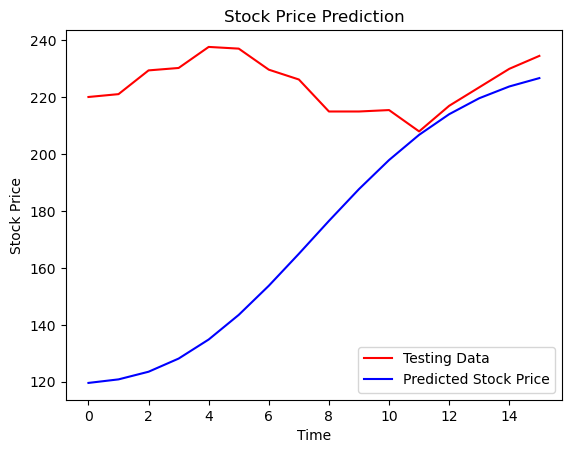

In [144]:
# Visulizing results 
plt.plot(testing_data, color = 'red', label = 'Testing Data')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [150]:
model_name = "Model/stock_price_forecasting.h5"
save_model(model, model_name)